In [92]:
 import pandas as pd

In [97]:
data = pd.read_csv('data1.csv')
data.drop(columns=['Unnamed: 0'], inplace=True)
print(data)

                                                Reviews
0     Okay, so I'm not a big video game buff, but wa...
1     The premise of this movie has been tickling my...
2     Jim Carrey is back to much the same role that ...
3     I read several mixed reviews and several of th...
4     Warning: Does contain spoilers.<br /><br />Ope...
...                                                 ...
7495  It was great to see some of my favorite stars ...
7496  2 stars for Kay Francis -- she's wonderful! An...
7497  I really wish i could give this a negative vot...
7498  I love B movies..but come on....this wasn't ev...
7499  As I said in my comment about the first part: ...

[7500 rows x 1 columns]


In [98]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
import swifter

In [99]:
def remove_html(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

data['processed']=data['Reviews'].swifter.apply(remove_html)
data.head(5)

Pandas Apply:   0%|          | 0/7500 [00:00<?, ?it/s]

,Reviews,processed
0,"Okay, so I'm not a big video game buff, but wa...","Okay, so I'm not a big video game buff, but wa..."
1,The premise of this movie has been tickling my...,The premise of this movie has been tickling my...
2,Jim Carrey is back to much the same role that ...,Jim Carrey is back to much the same role that ...
3,I read several mixed reviews and several of th...,I read several mixed reviews and several of th...
4,Warning: Does contain spoilers.<br /><br />Ope...,Warning: Does contain spoilers.Open Your EyesI...


In [102]:
def remove_splch(text):
    text = re.sub(r'^[\'\s]*|[^\w\s\'-]', '', text)
    return text
data['processed']=data['processed'].swifter.apply(remove_splch)
data.head(5)

Pandas Apply:   0%|          | 0/7500 [00:00<?, ?it/s]

,Reviews,processed
0,"Okay, so I'm not a big video game buff, but wa...",Okay so I'm not a big video game buff but was ...
1,The premise of this movie has been tickling my...,The premise of this movie has been tickling my...
2,Jim Carrey is back to much the same role that ...,Jim Carrey is back to much the same role that ...
3,I read several mixed reviews and several of th...,I read several mixed reviews and several of th...
4,Warning: Does contain spoilers.<br /><br />Ope...,Warning Does contain spoilersOpen Your EyesIf ...


In [103]:
def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.lower() not in stop_words and len(token) > 1]
    return tokens
data['processed']=data['processed'].swifter.apply(tokenize_and_remove_stopwords)
data.head(5)

Pandas Apply:   0%|          | 0/7500 [00:00<?, ?it/s]

,Reviews,processed
0,"Okay, so I'm not a big video game buff, but wa...","[Okay, 'm, big, video, game, buff, game, House..."
1,The premise of this movie has been tickling my...,"[premise, movie, tickling, imagination, quite,..."
2,Jim Carrey is back to much the same role that ...,"[Jim, Carrey, back, much, role, played, Mask, ..."
3,I read several mixed reviews and several of th...,"[read, several, mixed, reviews, several, downr..."
4,Warning: Does contain spoilers.<br /><br />Ope...,"[Warning, contain, spoilersOpen, EyesIf, seen,..."


In [104]:
def lemmatize(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens
data['processed']=data['processed'].swifter.apply(lemmatize)
data.head(5)

Pandas Apply:   0%|          | 0/7500 [00:00<?, ?it/s]

,Reviews,processed
0,"Okay, so I'm not a big video game buff, but wa...","[Okay, 'm, big, video, game, buff, game, House..."
1,The premise of this movie has been tickling my...,"[premise, movie, tickling, imagination, quite,..."
2,Jim Carrey is back to much the same role that ...,"[Jim, Carrey, back, much, role, played, Mask, ..."
3,I read several mixed reviews and several of th...,"[read, several, mixed, review, several, downri..."
4,Warning: Does contain spoilers.<br /><br />Ope...,"[Warning, contain, spoilersOpen, EyesIf, seen,..."


In [106]:
def lowercasing(tokens):
    return [token.lower() for token in tokens]
data['processed']=data['processed'].swifter.apply(lowercasing)
data.processed.head(5)

Pandas Apply:   0%|          | 0/7500 [00:00<?, ?it/s]

0    [okay, 'm, big, video, game, buff, game, house...
1    [premise, movie, tickling, imagination, quite,...
2    [jim, carrey, back, much, role, played, mask, ...
3    [read, several, mixed, review, several, downri...
4    [warning, contain, spoilersopen, eyesif, seen,...
Name: processed, dtype: object

In [109]:
def lowlentok(tokens, min_length=3, max_length=1000):
    return [token for token in tokens if min_length <= len(token) <= max_length]
def remove_numerical_tokens(tokens):
    return [token for token in tokens if not token.isdigit()]
def additional_token_cleaning(tokens):
    tokens = [re.sub(r'(.)\1+', r'\1\1', token) for token in tokens]
    tokens = [re.sub(r'\{.*?\}', '', token) for token in tokens]
    return tokens

In [111]:
data['processed']=data['processed'].swifter.apply(lowlentok)
data.processed.head(5)

Pandas Apply:   0%|          | 0/7500 [00:00<?, ?it/s]

0    [okay, big, video, game, buff, game, house, de...
1    [premise, movie, tickling, imagination, quite,...
2    [jim, carrey, back, much, role, played, mask, ...
3    [read, several, mixed, review, several, downri...
4    [warning, contain, spoilersopen, eyesif, seen,...
Name: processed, dtype: object

In [112]:
data['processed']=data['processed'].swifter.apply(remove_numerical_tokens)
data.processed.head(5)

Pandas Apply:   0%|          | 0/7500 [00:00<?, ?it/s]

0    [okay, big, video, game, buff, game, house, de...
1    [premise, movie, tickling, imagination, quite,...
2    [jim, carrey, back, much, role, played, mask, ...
3    [read, several, mixed, review, several, downri...
4    [warning, contain, spoilersopen, eyesif, seen,...
Name: processed, dtype: object

In [113]:
data['processed']=data['processed'].swifter.apply(additional_token_cleaning)
data.processed.head(5)

Pandas Apply:   0%|          | 0/7500 [00:00<?, ?it/s]

0    [okay, big, video, game, buff, game, house, de...
1    [premise, movie, tickling, imagination, quite,...
2    [jim, carrey, back, much, role, played, mask, ...
3    [read, several, mixed, review, several, downri...
4    [warning, contain, spoilersopen, eyesif, seen,...
Name: processed, dtype: object

In [115]:
def removetwn(tokens):
    tokens_without_numerals = [token for token in tokens if not any(char.isdigit() for char in token)]
    return tokens_without_numerals

data['processed']=data['processed'].swifter.apply(removetwn)
data.processed.head(5)

Pandas Apply:   0%|          | 0/7500 [00:00<?, ?it/s]

0    [okay, big, video, game, buff, game, house, de...
1    [premise, movie, tickling, imagination, quite,...
2    [jim, carrey, back, much, role, played, mask, ...
3    [read, several, mixed, review, several, downri...
4    [warning, contain, spoilersopen, eyesif, seen,...
Name: processed, dtype: object

In [117]:
def spl(tokens):
    preprocessed_tokens = []
    for token in tokens:
        token = re.sub(r'[^a-zA-Z]', '', token)
        if token:
            preprocessed_tokens.append(token.lower()) 
    return preprocessed_tokens

data['processed']=data['processed'].swifter.apply(spl)
data.processed.head(5)

Pandas Apply:   0%|          | 0/7500 [00:00<?, ?it/s]

0    [okay, big, video, game, buff, game, house, de...
1    [premise, movie, tickling, imagination, quite,...
2    [jim, carrey, back, much, role, played, mask, ...
3    [read, several, mixed, review, several, downri...
4    [warning, contain, spoilersopen, eyesif, seen,...
Name: processed, dtype: object

In [118]:
import nltk
nltk.download('words')
from nltk.corpus import words
english_vocab = set(words.words())

def removenet(tokens):
    english_tokens = []
    for token in tokens:
        if token.lower() in english_vocab:
            english_tokens.append(token)
    return english_tokens

data['processed']=data['processed'].swifter.apply(removenet)
data['processed']=data['processed'].swifter.apply(lowlentok)
data.processed.head(5)

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\akvnr\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


Pandas Apply:   0%|          | 0/7500 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/7500 [00:00<?, ?it/s]

0    [big, video, game, buff, game, house, dead, re...
1    [premise, movie, tickling, imagination, quite,...
2    [back, much, role, mask, timid, guy, trying, g...
3    [read, several, mixed, review, several, downri...
4    [warning, contain, seen, film, plan, stop, rea...
Name: processed, dtype: object

In [121]:
from sklearn.feature_extraction.text import TfidfVectorizer

tokenized_sentences = data.processed.tolist()
tokenized_words = [token for sublist in tokenized_sentences for token in sublist]
documents = [' '.join(tokenized_words)]
vectorizer = TfidfVectorizer()
tfidf_vector = vectorizer.fit_transform(documents)
tfidf_vector_array = tfidf_vector.toarray()
print("Vocabulary:", vectorizer.get_feature_names_out())
print("TF-IDF Vector:\n", tfidf_vector_array)

Vocabulary: ['aback' 'abandon' 'abandoned' ... 'zoo' 'zoom' 'zorro']
TF-IDF Vector:
 [[0.00013324 0.00070426 0.00186533 ... 0.00022841 0.00053295 0.00020937]]


In [140]:
import numpy as np
from sklearn.decomposition import LatentDirichletAllocation
from geneticalgorithm import geneticalgorithm as ga
import pandas as pd

def optimize_lda(num_topics):
    
    def objective(params):
        alpha = params[0]
        beta = params[1]
        decay = params[2]
        eta = params[3]
        offset = 1.0 + np.exp(params[4])  
        random_state = int(params[5])
        minimum_probability = params[6]

        lda = LatentDirichletAllocation(
            n_components=num_topics,
            doc_topic_prior=alpha,
            topic_word_prior=beta,
            learning_decay=decay,
            learning_offset=offset,
            random_state=random_state
        )

        lda.fit(tfidf_vector)

        return -lda.score(tfidf_vector)

    varbound = np.array([[0.1, 1.0], [0.1, 1.0], [0.5, 0.9], [0.1, 1.0], [np.log(1.0), np.log(10.0)], [1, 100], [0.01, 0.1]])

    algorithm_param = {'max_num_iteration': 100, 'population_size': 10, 'mutation_probability': 0.1, 'parents_portion': 0.3, 'crossover_probability': 0.5, 'elit_ratio': 0.01, 'crossover_type': 'uniform', 'max_iteration_without_improv': None}
    model = ga(function=objective, dimension=7, variable_type='real', variable_boundaries=varbound, algorithm_parameters=algorithm_param)

    model.run()

    best_params = model.output_dict['variable']
    best_alpha, best_beta, best_decay, best_eta, best_offset, best_random_state, best_minimum_probability = best_params

    best_settings = pd.DataFrame({
        'num_topics': [num_topics],
        'alpha': [best_alpha],
        'beta': [best_beta],
        'decay': [best_decay],
        'eta': [best_eta],
        'offset': [1.0 + np.exp(best_offset)],
        'random_state': [int(best_random_state)],
        'minimum_probability': [best_minimum_probability]
    })

    return best_settings


 The best solution found:                                                                           
 [ 0.11333261  0.99161492  0.6879621   0.18026763  0.25653174 23.9025086
  0.05479123]

 Objective function:
 233.97815535815994


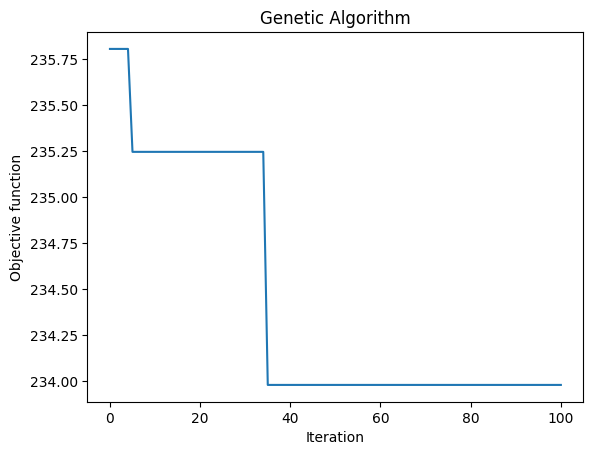

 The best solution found:                                                                           
 [1.08416503e-01 9.97593670e-01 7.84364832e-01 4.51722107e-01
 1.33960445e+00 4.91341581e+01 2.03050150e-02]

 Objective function:
 234.34630561647737


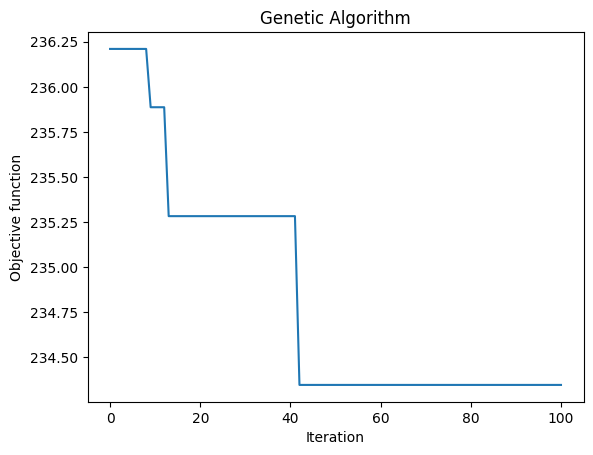

 The best solution found:                                                                           
 [0.10744699 0.98369664 0.731244   0.75740932 1.41737702 9.82078618
 0.05362205]

 Objective function:
 234.982845393467


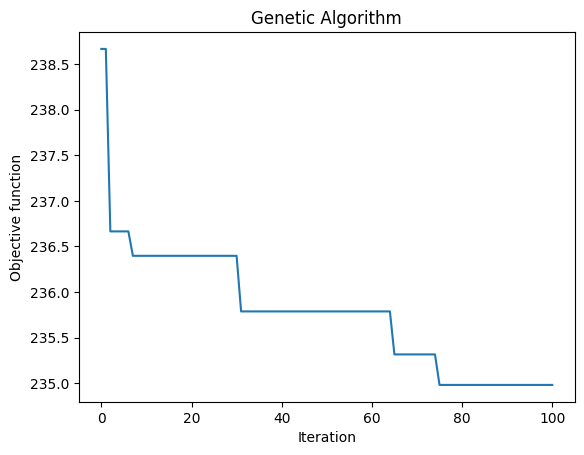

 The best solution found:                                                                           
 [ 0.10871426  0.98500748  0.60203519  0.29508793  2.18685907 77.09317401
  0.0853153 ]

 Objective function:
 235.4241497275199


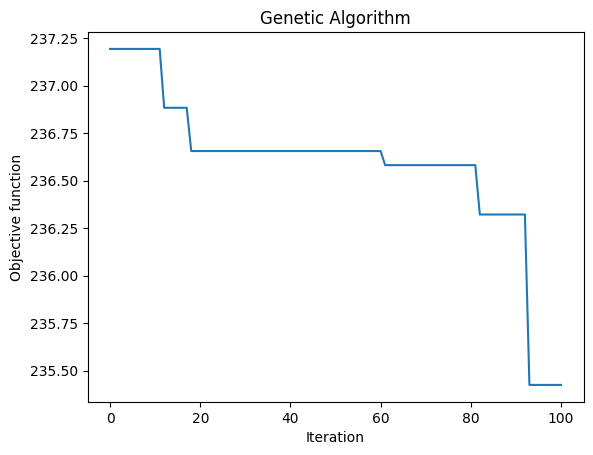

 The best solution found:                                                                           
 [1.12469067e-01 9.61973224e-01 6.45793410e-01 2.87687862e-01
 3.09096708e-01 8.64937813e+01 8.20888706e-02]

 Objective function:
 236.23630259802323


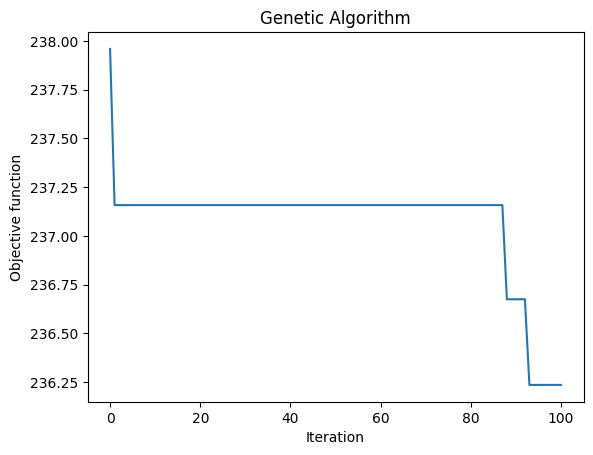

 The best solution found:                                                                           
 [1.02503902e-01 9.98493317e-01 8.19461865e-01 9.94027428e-01
 2.12339772e+00 5.19455278e+01 1.02227701e-02]

 Objective function:
 235.9113337640379


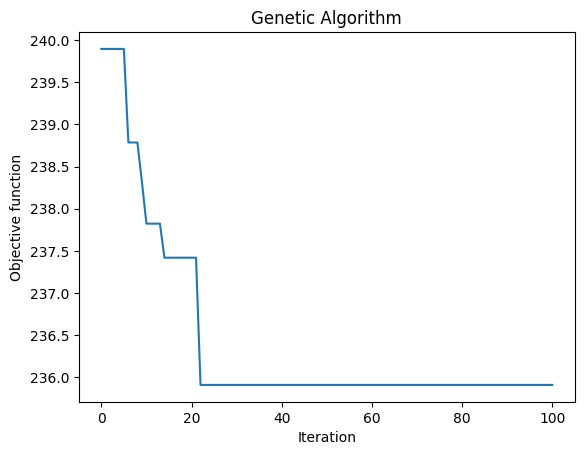

 The best solution found:                                                                           
 [ 0.14856197  0.93333702  0.6207694   0.45266706  1.37636474 30.76640644
  0.09973164]

 Objective function:
 238.29021665210058


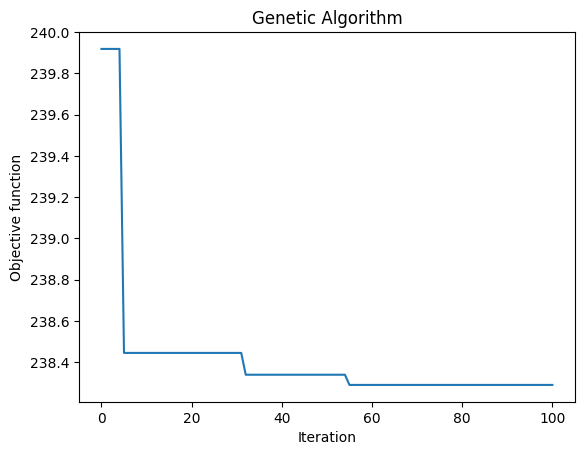

 The best solution found:                                                                           
 [ 0.10612723  0.99620811  0.6253715   0.51998096  1.98429868 65.73596605
  0.09575736]

 Objective function:
 236.7571822527828


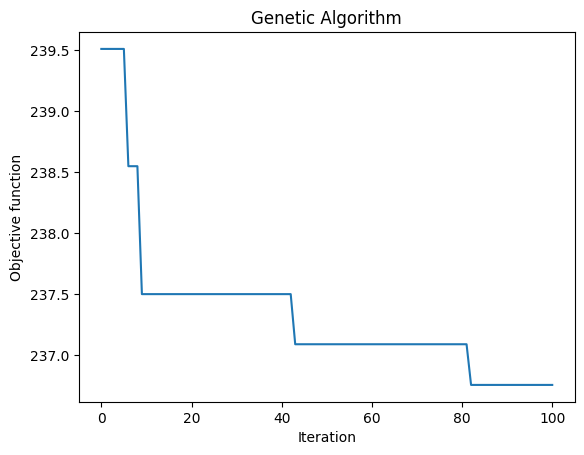

 The best solution found:                                                                           
 [0.13369108 0.96741318 0.68666532 0.95075807 1.01513838 1.55559503
 0.07293327]

 Objective function:
 238.25743361995757


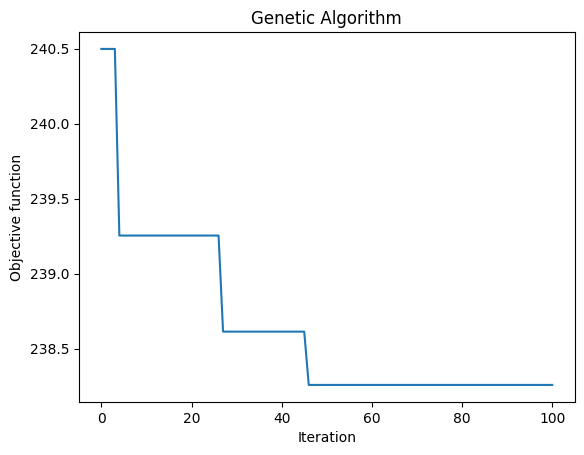

 The best solution found:                                                                           
 [ 0.10289907  0.98481469  0.66354204  0.20038543  0.63666163 25.70545939
  0.08177559]

 Objective function:
 237.4916327382993


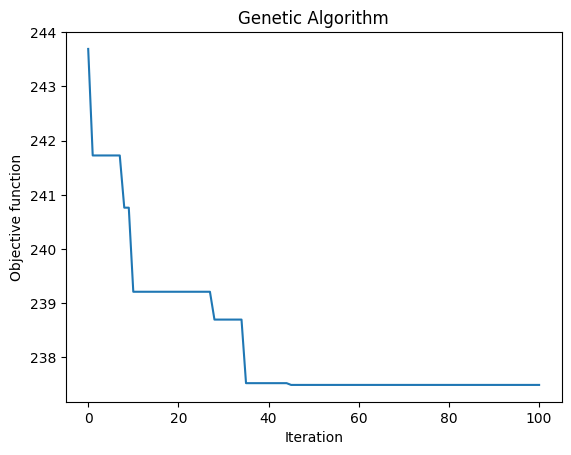

 The best solution found:                                                                           
 [ 0.11275472  0.9971242   0.62210768  0.83566985  0.89196563 71.2877629
  0.0761966 ]

 Objective function:
 237.96252684104405


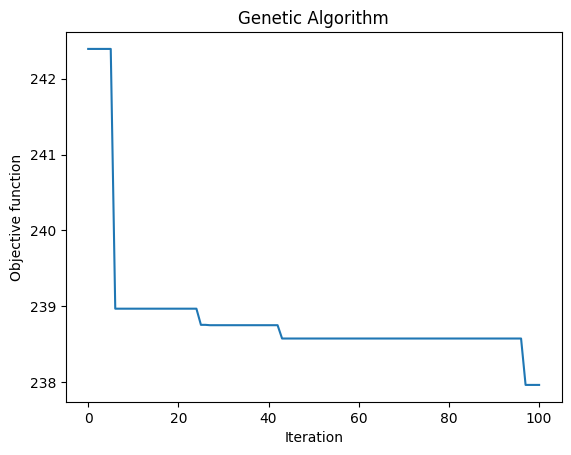

In [137]:
topic_range = range(5, 16)

best_settings_df = pd.DataFrame(columns=['num_topics', 'alpha', 'beta', 'decay', 'eta', 'offset', 'random_state', 'minimum_probability'])

for num_topics in topic_range:
    best_settings = optimize_lda(num_topics)
    best_settings_df = pd.concat([best_settings_df, best_settings], ignore_index=True)

In [145]:
best_settings_df

,num_topics,alpha,beta,decay,eta,offset,random_state,minimum_probability
0,5,0.113333,0.991615,0.687962,0.180268,2.292440,23,0.054791
1,6,0.108417,0.997594,0.784365,0.451722,4.817533,49,0.020305
2,7,0.107447,0.983697,0.731244,0.757409,5.126283,9,0.053622
3,8,0.108714,0.985007,0.602035,0.295088,9.907192,77,0.085315
4,9,0.112469,0.961973,0.645793,0.287688,2.362194,86,0.082089
5,10,0.102504,0.998493,0.819462,0.994027,9.359493,51,0.010223
6,11,0.148562,0.933337,0.620769,0.452667,4.960478,30,0.099732
7,12,0.106127,0.996208,0.625371,0.519981,8.273944,65,0.095757
8,13,0.133691,0.967413,0.686665,0.950758,3.759745,1,0.072933
9,14,0.102899,0.984815,0.663542,0.200385,2.890160,25,0.081776


In [148]:
x=best_settings_df

In [139]:
best_settings_df.to_csv('SetLDA.csv')